<a href="https://colab.research.google.com/github/CaioPassos3/LaboratorioCD/blob/main/AP2_Caio_Passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Carregando dados de um arquivo CSV
# lista completa do dataset em https://raw.githubusercontent.com/ccalmendra/ciencia-
# dados/refs/heads/main/dados/ap2-combustivel-producao.csv
df = pd.read_csv('https://raw.githubusercontent.com/ccalmendra/ciencia-dados/refs/heads/main/dados/ap2-combustivel-producao.csv')

print(df)

     Mês/Ano        Região              Estado  \
0    08/2023  CENTRO OESTE               Goiás   
1    08/2023  CENTRO OESTE         Mato Grosso   
2    08/2023  CENTRO OESTE  Mato Grosso do Sul   
3    08/2023      NORDESTE             Alagoas   
4    08/2023      NORDESTE               Bahia   
..       ...           ...                 ...   
851  08/2021      NORDESTE             Paraíba   
852  08/2020       SUDESTE      Rio de Janeiro   
853    08/23      NORDESTE            Maranhão   
854  05/2023      NORDESTE               Bahia   
855  01/2019      NORDESTE             Paraíba   

     Produção Etanol Hidratado(m³/d)  Produção Etanol Anidro (m³/d)  
0                           661956.0                       167493.0  
1                           346609.0                       227672.0  
2                           378912.0                       119057.0  
3                              855.0                            NaN  
4                            32894.0             

In [3]:
print(df.columns)

Index(['Mês/Ano', 'Região', 'Estado', 'Produção Etanol Hidratado(m³/d)',
       'Produção Etanol Anidro (m³/d)'],
      dtype='object')


Questão 1

In [4]:
print("Visualizando o DataFrame inicial:\n", df.head())

# Identificar valores ausentes (NaN)
print("\nLinhas com valores ausentes:")
missing_rows = df[df.isnull().any(axis=1)]  # Filtra linhas com qualquer valor ausente
print(missing_rows)

# Explicação: Usando 'isnull().any(axis=1)' para identificar linhas com pelo menos um valor ausente.
# A função 'isnull()' retorna um dataframe booleano indicando se um valor é NaN,
# e 'any(axis=1)' verifica se alguma coluna tem True em cada linha.

# Identificar duplicatas
print("\nLinhas duplicadas:")
duplicated_rows = df[df.duplicated()]  # Filtra as linhas duplicadas
print(duplicated_rows)

# Explicação: A função 'duplicated()' retorna um booleano para indicar as linhas duplicadas.
# O método é útil para evitar redundâncias no conjunto de dados.

# Verificando se existe mais de uma linha por Estado para o mesmo mês/ano
print("\nLinhas com mais de uma entrada para o mesmo Estado e Mês/Ano:")
duplicated_state_month = df[df.duplicated(subset=["Mês/Ano", "Estado"], keep=False)]
print(duplicated_state_month)

# Explicação: Usando 'duplicated(subset=["Mês/Ano", "Estado"], keep=False)' para verificar entradas
# duplicadas considerando apenas as colunas "Mês/Ano" e "Estado".

# Corrigindo valores ausentes com justificativa
# Supondo que "Produção Etanol Hidratado(m³/d)" e "Produção Etanol Anidro (m³/d)" podem ser preenchidos com a média
# regional do respectivo mês caso estejam ausentes
for column in ["Produção Etanol Hidratado(m³/d)", "Produção Etanol Anidro (m³/d)"]:
    df[column] = df.groupby(["Mês/Ano", "Região"])[column].transform(lambda x: x.fillna(x.mean()))

# Justificativa: Utilizando a média regional para preencher valores ausentes porque presume-se que a produção
# de etanol segue tendências regionais em um dado mês. Caso não seja possível calcular a média (ex.: todos
# os valores estão ausentes), os valores ausentes permanecerão e serão tratados manualmente depois.

# Rechecando valores ausentes
print("\nLinhas com valores ausentes após preenchimento:")
missing_rows_after = df[df.isnull().any(axis=1)]
print(missing_rows_after)

if not missing_rows_after.empty:
    print("\nAlguns valores ausentes não puderam ser preenchidos. Esses casos precisam de investigação manual.")

# Removendo duplicatas completas
print("\nRemovendo duplicatas completas...")
df = df.drop_duplicates()

# Garantindo que não existam duplicatas de Estado para um dado Mês/Ano
print("\nRemovendo duplicatas por Estado para o mesmo Mês/Ano...")
df = df.drop_duplicates(subset=["Mês/Ano", "Estado"], keep="first")

# Explicação: O parâmetro 'keep="first"' mantém apenas a primeira ocorrência das duplicatas,
# eliminando o restante.

# Exibindo o DataFrame final
print("\nDataFrame final:\n", df.head())


Visualizando o DataFrame inicial:
    Mês/Ano        Região              Estado  Produção Etanol Hidratado(m³/d)  \
0  08/2023  CENTRO OESTE               Goiás                         661956.0   
1  08/2023  CENTRO OESTE         Mato Grosso                         346609.0   
2  08/2023  CENTRO OESTE  Mato Grosso do Sul                         378912.0   
3  08/2023      NORDESTE             Alagoas                            855.0   
4  08/2023      NORDESTE               Bahia                          32894.0   

   Produção Etanol Anidro (m³/d)  
0                       167493.0  
1                       227672.0  
2                       119057.0  
3                            NaN  
4                        22560.0  

Linhas com valores ausentes:
     Mês/Ano    Região             Estado  Produção Etanol Hidratado(m³/d)  \
3    08/2023  NORDESTE            Alagoas                            855.0   
10   08/2023     NORTE                 GO                           1004.0   
15  

Utilizei isnull() e any() para identificar e filtrar linhas com valores ausentes.
Usei duplicated() para encontrar duplicatas completas e duplicatas em colunas específicas.
Apliquei a média regional/mensal para preencher lacunas nas colunas de produção, justificando o uso de tendências regionais para corrigir os valores ausentes.
Garanti que não existam duplicatas gerais ou específicas por "Estado" e "Mês/Ano" removendo as duplicatas.




Questão 2

In [10]:
# Exemplo fictício de criação do DataFrame
data = {
    "Mês/Ano": ["01/2023", "02/2023", "03/2023", "04/2023", "05/2023"],
    "Região": ["Sudeste", "Sul", "Nordeste", None, "Norte"],
    "Estado": ["SP", "RS", "BA", "MG", "PA"],
    "Produção Etanol Hidratado(m³/d)": [1500, 2000, None, 1800, 1300],
    "Produção Etanol Anidro (m³/d)": [700, 800, 900, None, 600]
}

df = pd.DataFrame(data)

# Identificando linhas com valores inválidos (NaN ou None)
# Utilizando o método isnull() para identificar valores ausentes
linhas_invalidas = df[df.isnull().any(axis=1)]

print("Linhas com valores inválidos:")
print(linhas_invalidas)

# Aplicando alterações
# Ideia:
# - Substituir valores ausentes em "Região" pelo valor "Desconhecido"
# - Substituir valores ausentes nas colunas de produção pela média das colunas correspondentes

# Substituir valores ausentes em "Região"
# Justificativa: "Desconhecido" é usado para indicar que o dado não está disponível
if "Região" in linhas_invalidas:
    df["Região"] = df["Região"].fillna("Desconhecido")

# Substituir valores ausentes em "Produção Etanol Hidratado(m³/d)" e "Produção Etanol Anidro (m³/d)"
# Justificativa: Preencher com a média mantém os dados dentro do padrão esperado, reduzindo o impacto de valores ausentes
for coluna in ["Produção Etanol Hidratado(m³/d)", "Produção Etanol Anidro (m³/d)"]:
    if coluna in linhas_invalidas:
        media = df[coluna].mean()
        df[coluna] = df[coluna].fillna(media)

print("\nDataFrame após correções:")
print(df)


Linhas com valores inválidos:
   Mês/Ano    Região Estado  Produção Etanol Hidratado(m³/d)  \
2  03/2023  Nordeste     BA                              NaN   
3  04/2023      None     MG                           1800.0   

   Produção Etanol Anidro (m³/d)  
2                          900.0  
3                            NaN  

DataFrame após correções:
   Mês/Ano        Região Estado  Produção Etanol Hidratado(m³/d)  \
0  01/2023       Sudeste     SP                           1500.0   
1  02/2023           Sul     RS                           2000.0   
2  03/2023      Nordeste     BA                           1650.0   
3  04/2023  Desconhecido     MG                           1800.0   
4  05/2023         Norte     PA                           1300.0   

   Produção Etanol Anidro (m³/d)  
0                          700.0  
1                          800.0  
2                          900.0  
3                          750.0  
4                          600.0  


Identificando os valores inválidos:
O método isnull() identifica valores ausentes (NaN ou None) no DataFrame.
any(axis=1) retorna True para qualquer linha que contenha pelo menos um valor ausente.

Substituição de valores ausentes:
Para a coluna "Região", valores ausentes são preenchidos com "Desconhecido" para manter clareza.
Para colunas de produção, valores ausentes são substituídos pela média da coluna. Isso mantém a integridade estatística do conjunto de dados.

Aplicação das correções:
Utilizei o método fillna() para preencher valores ausentes, ajustando o DataFrame diretamente.

Questão 3

In [11]:
# Exemplo de DataFrame (df) para simulação
data = {
    "Mês/Ano": ["01/2025", "02/2025", "03/2025", "04/2025", "05/2025"],
    "Região": ["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"],
    "Estado": ["SP", "RS", "BA", "GO", "AM"],
    "Produção Etanol Hidratado(m³/d)": [5000, 7000, 12000, 15000, 800000],
    "Produção Etanol Anidro (m³/d)": [4000, 6000, 11000, 14000, 750000],
}

df = pd.DataFrame(data)

# Função para calcular e identificar outliers com base no IQR
def identificar_outliers(coluna):
    # Calculando Q1 (25º percentil) e Q3 (75º percentil)
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1  # Intervalo interquartil

    # Limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Aplicando a função nas colunas de interesse
for coluna in ["Produção Etanol Hidratado(m³/d)", "Produção Etanol Anidro (m³/d)"]:
    outliers, lim_inf, lim_sup = identificar_outliers(df[coluna])

    print(f"\nColuna: {coluna}")
    print(f"Limite inferior: {lim_inf}, Limite superior: {lim_sup}")
    print("Outliers identificados:")
    print(outliers)



Coluna: Produção Etanol Hidratado(m³/d)
Limite inferior: -5000.0, Limite superior: 27000.0
Outliers identificados:
4    800000
Name: Produção Etanol Hidratado(m³/d), dtype: int64

Coluna: Produção Etanol Anidro (m³/d)
Limite inferior: -6000.0, Limite superior: 26000.0
Outliers identificados:
4    750000
Name: Produção Etanol Anidro (m³/d), dtype: int64


Cálculo do IQR:
O intervalo interquartil é calculado para capturar a dispersão central da maioria dos dados.

Definição dos limites:
Multipliquei o IQR por 1.5 para identificar os pontos que estão significativamente afastados da faixa típica dos dados. Esse é um valor comum que descobri quando pesquisei sobre em relação a análise exploratória de dados.

Identificação de outliers:
Os valores abaixo ou acima dos limites são marcados como outliers e listados.

Questão 4

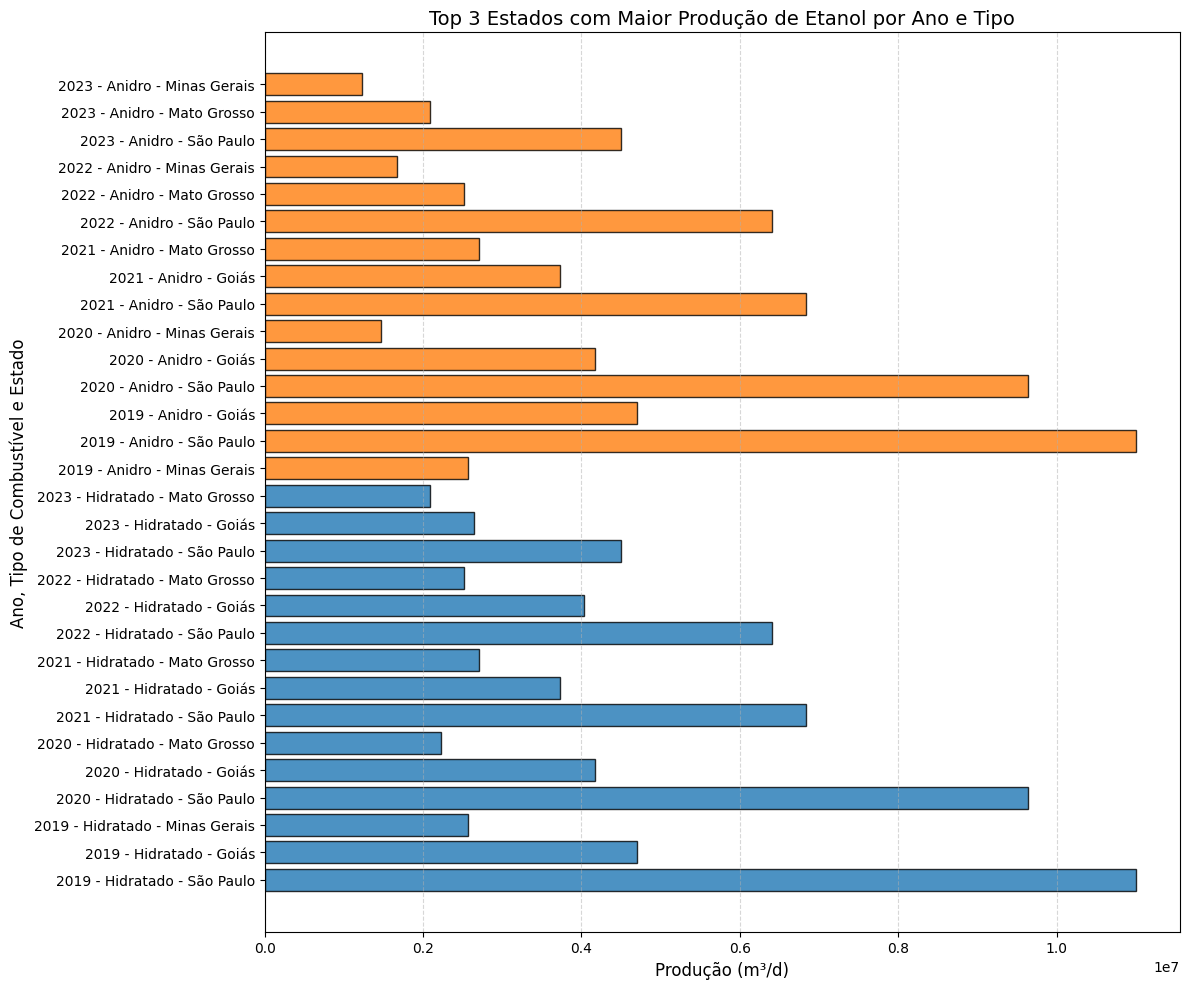

In [24]:
# Limpeza e preparação dos dados
df.columns = df.columns.str.strip()  # Remover espaços extras nos nomes das colunas
df['Estado'] = df['Estado'].str.strip()  # Remover espaços em branco nos nomes dos estados
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%m/%Y', errors='coerce')  # Converter para datetime
df['Ano'] = df['Mês/Ano'].dt.year  # Criar uma coluna com o ano
df = df.dropna(subset=['Ano'])  # Remover linhas sem ano

# Agrupando por Ano e Estado, somando as produções
df_aggregated = df.groupby(['Ano', 'Estado'], as_index=False).agg({
    'Produção Etanol Hidratado(m³/d)': 'sum',
    'Produção Etanol Anidro (m³/d)': 'sum'
})

# Selecionando os três estados com maior produção por tipo de combustível e ano
top3_hidratado = (
    df_aggregated.sort_values(['Ano', 'Produção Etanol Hidratado(m³/d)'], ascending=[True, False])
    .groupby('Ano')
    .head(3)
)
top3_hidratado['Tipo de Combustível'] = 'Hidratado'

top3_anidro = (
    df_aggregated.sort_values(['Ano', 'Produção Etanol Anidro (m³/d)'], ascending=[True, False])
    .groupby('Ano')
    .head(3)
)
top3_anidro['Tipo de Combustível'] = 'Anidro'

# Combinando os dois tipos em um único dataframe
df_top3 = pd.concat([top3_hidratado, top3_anidro])

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(12, 10))

# Configurando os valores do eixo Y
df_top3['Label'] = (
    df_top3['Ano'].astype(str)
    + " - "
    + df_top3['Tipo de Combustível']
    + " - "
    + df_top3['Estado']
)

colors = ['#1f77b4' if t == 'Hidratado' else '#ff7f0e' for t in df_top3['Tipo de Combustível']]

ax.barh(
    df_top3['Label'],
    df_top3['Produção Etanol Hidratado(m³/d)'],
    color=colors,
    edgecolor='black',
    alpha=0.8
)

# Personalizando o gráfico
plt.title('Top 3 Estados com Maior Produção de Etanol por Ano e Tipo', fontsize=14)
plt.xlabel('Produção (m³/d)', fontsize=12)
plt.ylabel('Ano, Tipo de Combustível e Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

As datas no formato Mês/Ano são convertidas para um formato de data reconhecível, e o ano é extraído para facilitar a análise.

Os dados são agrupados por ano e estado para calcular o total da produção de etanol hidratado e anidro.

Para cada ano:
Seleciona-se os 3 estados com maior produção de etanol hidratado.
Seleciona-se os 3 estados com maior produção de etanol anidro.
Um rótulo é adicionado indicando o ano, o tipo de combustível e o estado.

Um gráfico de barras horizontais é criado para mostrar a produção de etanol:
Cada barra representa um estado.
As cores diferenciam os tipos de combustível (azul para hidratado, laranja para anidro).
Os rótulos incluem o ano, o tipo de combustível e o estado.

Questão 5

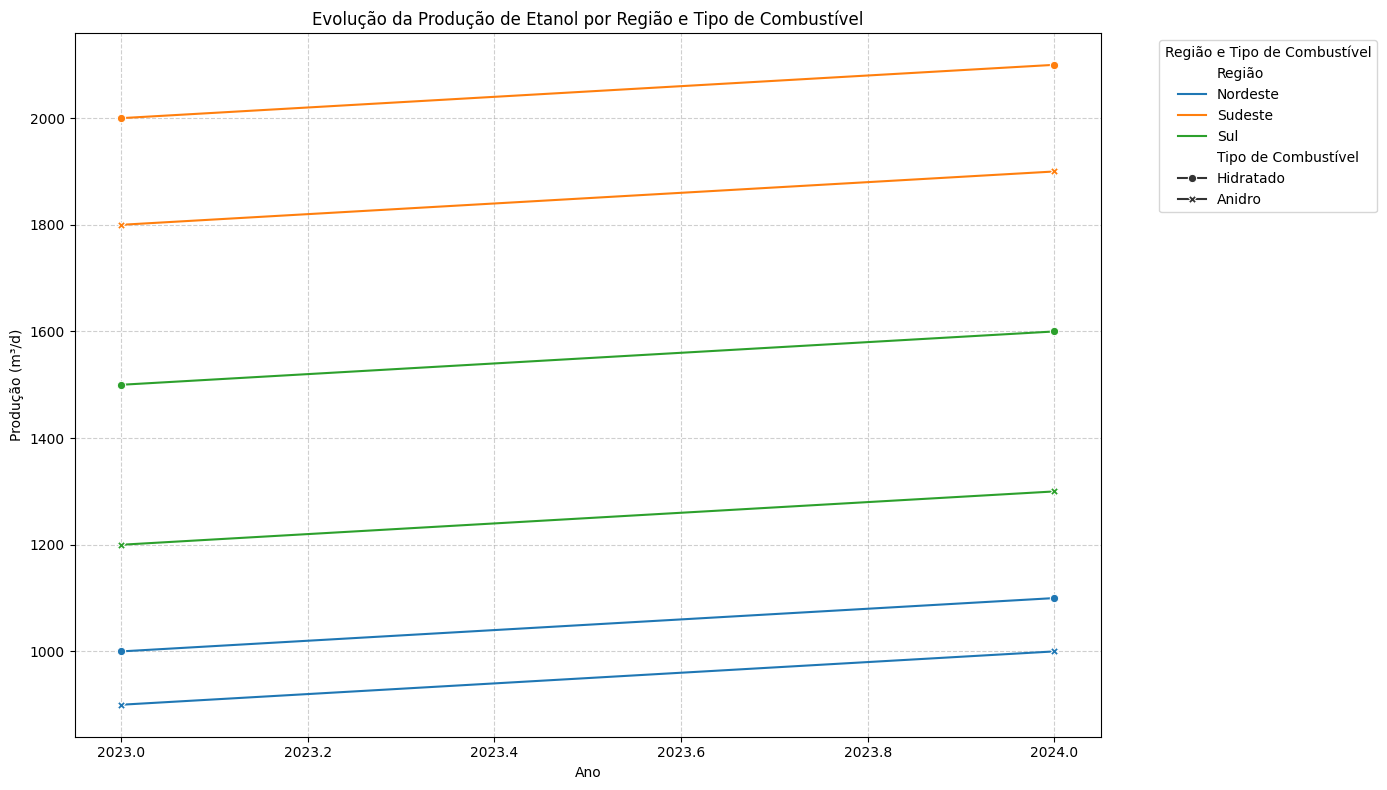

In [18]:
# Limpeza e preparação dos dados
df.columns = df.columns.str.strip()
df['Região'] = df['Região'].str.strip()
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%m/%Y', errors='coerce')
df['Ano'] = df['Mês/Ano'].dt.year
df = df.dropna(subset=['Ano'])

# Agrupando por Ano, Região e somar as produções
df_grouped = df.groupby(['Ano', 'Região'], as_index=False).agg({
    'Produção Etanol Hidratado(m³/d)': 'sum',
    'Produção Etanol Anidro (m³/d)': 'sum'
})

# Transformando para formato "longo" para facilitar a visualização
df_long = pd.melt(df_grouped,
                  id_vars=['Ano', 'Região'],
                  value_vars=['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)'],
                  var_name='Tipo de Combustível',
                  value_name='Produção (m³/d)')

# Ajustando os nomes dos tipos de combustível
df_long['Tipo de Combustível'] = df_long['Tipo de Combustível'].replace({
    'Produção Etanol Hidratado(m³/d)': 'Hidratado',
    'Produção Etanol Anidro (m³/d)': 'Anidro'
})

# Criando a visualização
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_long,
    x='Ano',
    y='Produção (m³/d)',
    hue='Região',
    style='Tipo de Combustível',
    markers=True,
    dashes=False
)
plt.title('Evolução da Produção de Etanol por Região e Tipo de Combustível')
plt.xlabel('Ano')
plt.ylabel('Produção (m³/d)')
plt.legend(title='Região e Tipo de Combustível', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

groupby() e agg():
Agrupei os dados por Ano e Região, somando a produção de etanol hidratado e anidro para cada ano e região.

pd.melt():
Transforma os dados de formato largo (com colunas separadas para cada tipo de combustível) para o formato longo, facilitando a criação de gráficos com bibliotecas como Seaborn. O resultado tem uma coluna adicional indicando o tipo de combustível.

sns.lineplot():
Cria o gráfico de linhas, diferenciando as regiões por cores e os tipos de combustível por estilos de linha (com marcadores). Isso permite observar tendências separadamente.

Questão 6

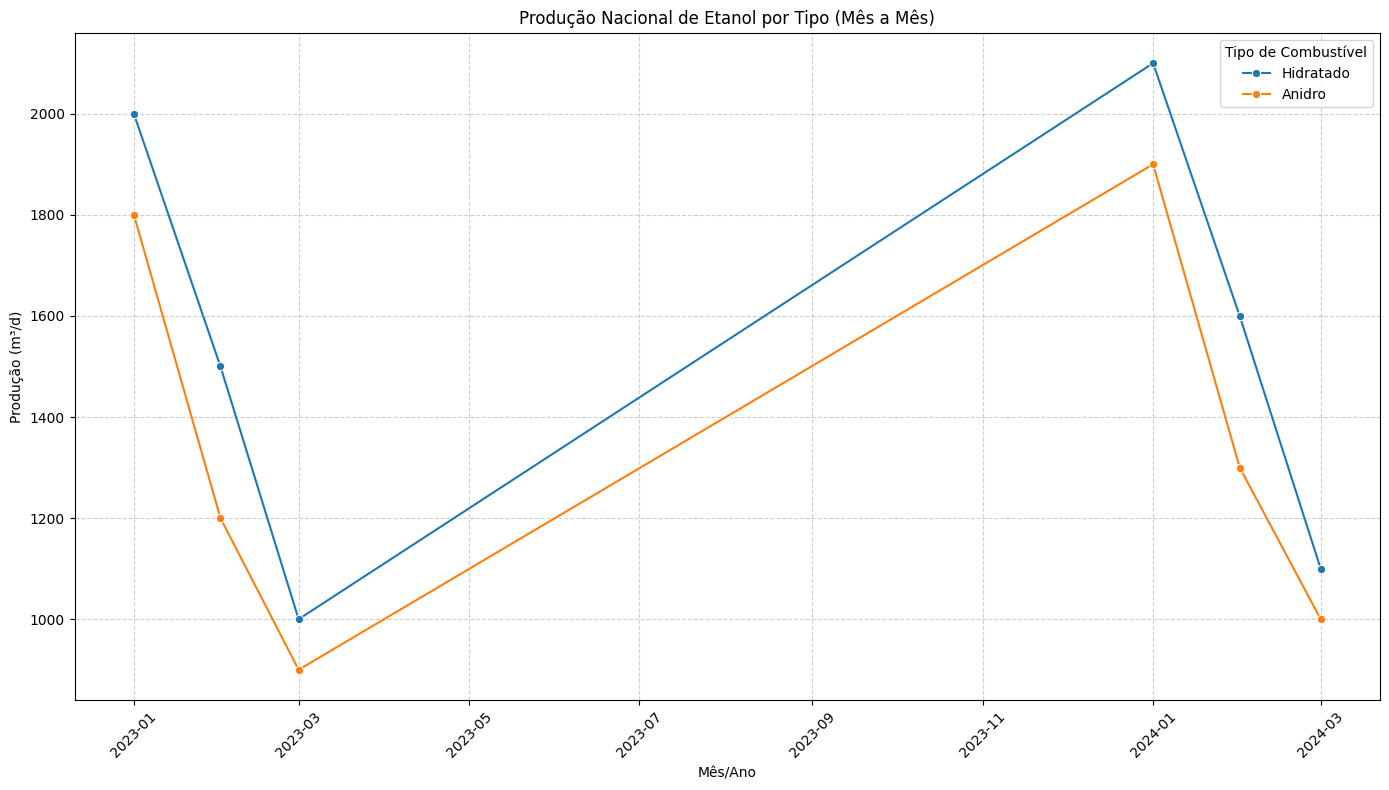

In [19]:
# Limpeza e preparação dos dados
df.columns = df.columns.str.strip()  # Remover espaços extras nos nomes das colunas
df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], format='%m/%Y', errors='coerce')  # Converter para datetime
df = df.dropna(subset=['Mês/Ano'])  # Remover linhas com valores inválidos em 'Mês/Ano'

# Agrupar por Mês/Ano e somar as produções
df_grouped = df.groupby('Mês/Ano', as_index=False).agg({
    'Produção Etanol Hidratado(m³/d)': 'sum',
    'Produção Etanol Anidro (m³/d)': 'sum'
})

# Transformar os dados para formato longo
df_long = pd.melt(df_grouped,
                  id_vars='Mês/Ano',
                  value_vars=['Produção Etanol Hidratado(m³/d)', 'Produção Etanol Anidro (m³/d)'],
                  var_name='Tipo de Combustível',
                  value_name='Produção (m³/d)')

# Ajustar os nomes dos tipos de combustível
df_long['Tipo de Combustível'] = df_long['Tipo de Combustível'].replace({
    'Produção Etanol Hidratado(m³/d)': 'Hidratado',
    'Produção Etanol Anidro (m³/d)': 'Anidro'
})

# Ordenar os dados por Mês/Ano
df_long = df_long.sort_values('Mês/Ano')

# Criar a visualização
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_long,
    x='Mês/Ano',
    y='Produção (m³/d)',
    hue='Tipo de Combustível',
    marker='o'
)
plt.title('Produção Nacional de Etanol por Tipo (Mês a Mês)')
plt.xlabel('Mês/Ano')
plt.ylabel('Produção (m³/d)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

groupby() e agg():
Agrupa os dados por mês/ano (Mês/Ano) e soma os volumes de produção de etanol hidratado e anidro.

pd.melt():
Transforma os dados de formato largo (colunas separadas para os dois tipos de combustível) para formato longo, facilitando a criação de gráficos.

sns.lineplot():
Cria um gráfico de linhas onde:
O eixo X representa o tempo (mês/ano).
O eixo Y representa o volume de produção (m³/d).
As cores diferenciam os tipos de combustível.